# NLP Basic Assignment
## 과제 : spam.csv를 활용하여 유의미한 해석을 도출해주세요!

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다.
- 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다.

In [2]:
spam = pd.read_csv('spam.csv')

In [3]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [4]:
spam.columns = ['Label', 'Message']

In [5]:
spam.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Tokenizing


In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [8]:
# 'Message' 열에서 텍스트 가져오고 토큰화 수행
tokenized_texts = []

for text in spam['Message']:
    # 1. 소문자로 변환
    text = text.lower()
    
    # 2. 특수 문자 제거
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # 3. 토큰화
    tokens = word_tokenize(text)
    
    # 4. 불용어 제거
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    tokenized_texts.append(tokens)

# 결과 확인
print(tokenized_texts)

[['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat'], ['ok', 'lar', 'joking', 'wif', 'u', 'oni'], ['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply'], ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'], ['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though'], ['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv'], ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent'], ['per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', 'copy', 'friends', 'callertune'], ['winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl', 'valid', 'hours'], ['mobile', 'months', '

In [9]:
df = pd.DataFrame({'Label': spam.Label, 'Message': tokenized_texts})
df.Label = spam.Label.replace(['ham','spam'],[0,1])
df

,Label,Message
0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"[nah, think, goes, usf, lives, around, though]"
...,...,...
5567,1,"[nd, time, tried, contact, u, u, pound, prize,..."
5568,0,"[b, going, esplanade, fr, home]"
5569,0,"[pity, mood, suggestions]"
5570,0,"[guy, bitching, acted, like, interested, buyin..."


## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram 등이 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

### One-hot encoding

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
# spam

cv2 = CountVectorizer(max_features= 500, stop_words = 'english', lowercase= False)
corpus_spam = sum(df[df.Label == 1]['Message'], []) 
cv_spam = cv2.fit_transform(corpus_spam)

count_spam = pd.DataFrame( {'word' : cv2.get_feature_names_out(),
                           'count' : cv_spam.sum(axis = 0).flat})
# 빈도수가 높은 단어 상위 10개 추출
count_spam.sort_values('count', ascending = False).head(10) 

,word,count
147,free,228
436,txt,170
446,ur,144
252,mobile,129
411,text,126
392,stop,126
65,claim,113
343,reply,104
486,www,98
320,prize,93


In [12]:
# ham

cv1 = CountVectorizer(max_features = 500, stop_words = 'english', lowercase = False)
corpus_ham = sum(df[df.Label == 0]['Message'], [])
cv_ham = cv1.fit_transform(corpus_ham)

count_ham = pd.DataFrame( {'word' : cv1.get_feature_names_out(),
                           'count' : cv_ham.sum(axis = 0).flat})
 # 빈도수가 높은 단어 상위 10개 추출
count_ham.sort_values('count', ascending = False).head(10)

,word,count
161,gt,318
247,lt,316
300,ok,287
157,got,245
453,ur,241
215,know,236
155,good,233
232,like,232
68,come,228
84,day,216


In [13]:
from gensim.models import Word2Vec

### CBOW

In [14]:
# spam

model = Word2Vec(df[df.Label == 1]['Message'], min_count=5, vector_size=100, window=2, epochs=200, sg=0)
model.save('w2v_cbow_spam')
w2v_cbow_spam = Word2Vec.load('w2v_cbow_spam')
x1 = w2v_cbow_spam.wv.most_similar('free')
x1

[('minutes', 0.4164806604385376),
 ('get', 0.4022439122200012),
 ('colour', 0.36461713910102844),
 ('phones', 0.3561241626739502),
 ('tomorrow', 0.3442230820655823),
 ('unlimited', 0.3274535834789276),
 ('latest', 0.32712817192077637),
 ('may', 0.3210979700088501),
 ('mobile', 0.31806516647338867),
 ('ringtone', 0.31634849309921265)]

In [15]:
# ham

model = Word2Vec(df[df.Label == 0]['Message'], min_count=5, vector_size=100, window=2, epochs=200, sg=0)
model.save('w2v_cbow_ham')
w2v_cbow_ham = Word2Vec.load('w2v_cbow_ham')
y1 = w2v_cbow_ham.wv.most_similar('ok')
y1

[('home', 0.37722259759902954),
 ('din', 0.3518245816230774),
 ('ard', 0.3338989317417145),
 ('cuz', 0.2857911288738251),
 ('look', 0.2852706015110016),
 ('u', 0.2846812903881073),
 ('anything', 0.27609485387802124),
 ('uni', 0.26585566997528076),
 ('trying', 0.2567647397518158),
 ('plans', 0.2493053674697876)]

### Skip-gram

In [16]:
# spam

model = Word2Vec(df[df.Label == 1]['Message'], min_count=5, vector_size=100, window=2, epochs=200, sg=1)
model.save('w2v_skipgram_spam')
w2v_skipgram_spam = Word2Vec.load('w2v_skipgram_spam')
x2 = w2v_skipgram_spam.wv.most_similar('free')
x2

[('minutes', 0.41843754053115845),
 ('tomorrow', 0.37925097346305847),
 ('tariffs', 0.3783101737499237),
 ('phones', 0.37464639544487),
 ('sipix', 0.3728157877922058),
 ('sonyericsson', 0.3694707453250885),
 ('stoptxt', 0.36369436979293823),
 ('linerental', 0.3621900677680969),
 ('bluetooth', 0.35796886682510376),
 ('unlimited', 0.3538326919078827)]

In [17]:
# ham

model = Word2Vec(df[df.Label == 0]['Message'], min_count=5, vector_size=100, window=2, epochs=200, sg=1)
model.save('w2v_skipgram_ham')
w2v_skipgram_ham = Word2Vec.load('w2v_skipgram_ham')
y2 = w2v_skipgram_ham.wv.most_similar('ok')
y2

[('cuz', 0.4743978679180145),
 ('mm', 0.4585171341896057),
 ('reaching', 0.40156441926956177),
 ('sed', 0.4010542631149292),
 ('uni', 0.39287588000297546),
 ('ard', 0.39251962304115295),
 ('jus', 0.36533042788505554),
 ('din', 0.3647666275501251),
 ('worry', 0.3643011450767517),
 ('boring', 0.35926586389541626)]

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

### 유사도 : 스팸 메일과 정상 메일의 빈도수가 높은 단어(free,ok)의 유사도들을 비교

In [18]:
x1 = [item[0] for item in x1]
y1 = [item[0] for item in y1]
x2 = [item[0] for item in x2]
y2 = [item[0] for item in y2]

In [19]:
# spam

result_spam = {'w2v_cbow_spam' : x1, 'w2v_skipgram_spam' : x2}
result = pd.DataFrame.from_dict(result_spam, orient='index')                    
result = result.transpose()
result

,w2v_cbow_spam,w2v_skipgram_spam
0,minutes,minutes
1,get,tomorrow
2,colour,tariffs
3,phones,phones
4,tomorrow,sipix
5,unlimited,sonyericsson
6,latest,stoptxt
7,may,linerental
8,mobile,bluetooth
9,ringtone,unlimited


##### CBOW와 Skip-gram 모델에서 공통적으로 나타나는 단어는 'minutes'와 'tomorrow'입니다.

- 'minutes'와 'tomorrow'는 메시지에 긴급성이나 미래 시간 압박을 나타내는 데 사용됩니다. 스팸 메일은 수신자의 주의를 끌기 위해 긴급한 상황이나 빠른 조치가 필요하다는 느낌을 주려고 할 수 있습니다.
- 'minutes'와 'tomorrow'는 할인, 특별 프로모션, 제한된 시간 동안 유효한 혜택 등과 관련된 광고와 프로모션에 자주 사용됩니다.
- 스미싱 공격과 같은 사기 시도에 사용될 수 있습니다. 스팸 메일은 수신자에게 특정 시점까지 어떤 조치를 취하도록 요구하며 'minutes', 'tomorrow'와 같은 단어를 사용할 수 있습니다.

##### 위와 같은 이유들로 'minutes'와 'tomorrow'는 스팸 메일에서 자주 사용될 수 있을 것 같습니다. 그렇기에 유의미한 결과라고 생각합니다. 추가로 두 모델 중 더 적합한 모델은 get, latest, may, mobile 처럼 스팸 메일과 관련성이 높아보이는 단어를 추출한 CBOW인 것 같습니다. 

In [20]:
# ham

result_ham = {'w2v_cbow_ham' : y1, 'w2v_skipgram_ham' : y2}
result = pd.DataFrame.from_dict(result_ham, orient='index')                    
result = result.transpose()
result

,w2v_cbow_ham,w2v_skipgram_ham
0,home,cuz
1,din,mm
2,ard,reaching
3,cuz,sed
4,look,uni
5,u,ard
6,anything,jus
7,uni,din
8,trying,worry
9,plans,boring


##### CBOW와 Skip-gram 모델에서 공통적으로 나타나는 단어는 'cuz'와 'din'입니다.

- 'cuz'는 'because'의 축약어로 사용되며, 'din'은 'didn't'의 축약어로 사용될 수 있습니다. 이러한 축약어와 대화체 표현은 일상적인 대화나 텍스트 메시지에서 자주 사용됩니다. 정상 메일은 때론 일상적인 언어와 대화 스타일을 포함하므로 이러한 축약어와 대화체 표현이 자주 나타날 수 있습니다.
- 정상 메일은 공식적인 비즈니스 통신이 아닌 경우가 많습니다. 비공식적인 커뮤니케이션에서는 축약어나 비표준 표현이 더 자주 사용될 수 있으며, 'cuz'나 'din'과 같은 단어는 이러한 비공식적인 커뮤니케이션에서 자주 사용됩니다.
- 정상 메일은 다양한 사용자 그룹으로부터 발송되며, 사용자들은 자신만의 언어 습관을 가지고 있습니다. 이러한 습관에 따라 특정 축약어나 비표준 표현을 사용할 수 있으며, 이러한 다양성을 고려하지 않으면 정상 메일을 잘못 분류할 수 있습니다.

##### 위와 같은 이유들로 'cuz'와 'din'이 정상 메일에서 자주 사용될 수 있을 것 같습니다. 그렇기에 유의미한 결과라고 생각합니다. 추가로 두 모델 중 더 적합한 모델은 home, anything, plans 처럼 일상적인 단어가 많이 등장한 CBOW인 것 같습니다. 

### Wordcloud

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

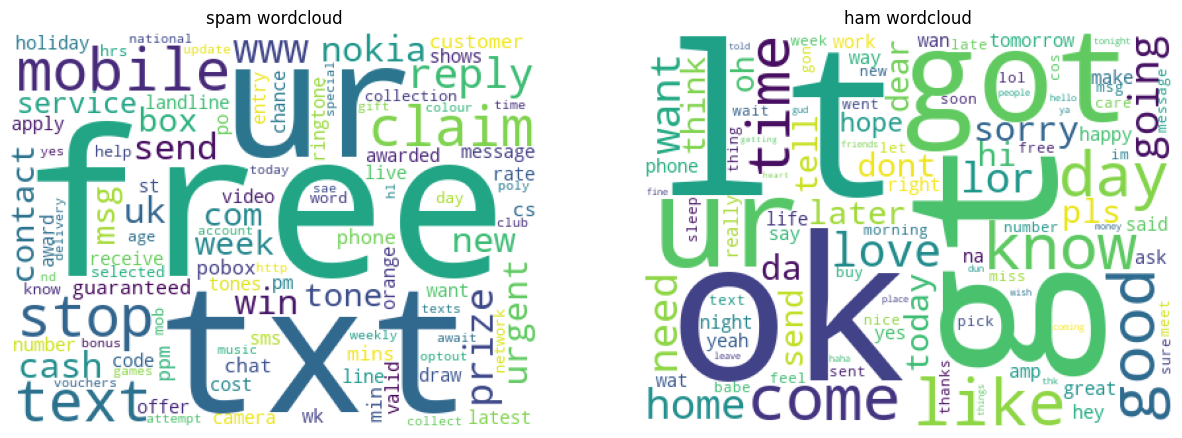

In [27]:
wc = WordCloud(background_color='white', max_words=100, width = 400, height = 300)

plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
plt.title('spam wordcloud')
count_dic = dict(zip(count_spam['word'], count_spam['count']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

plt.subplot(1,2,2)
plt.title('ham wordcloud')
count_dic = dict(zip(count_ham['word'], count_ham['count']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

plt.show

### 이진 분류 모델 : 나이브 베이즈 분류기를 이용

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [32]:
X_train, X_test, y_train, y_test = train_test_split(spam['Message'], spam['Label'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

정확도: 0.9623318385650225


##### 스팸 메일과 정상 메일의 분류 정확도는 약 0.9623으로 높게 나왔음을 확인할 수 있습니다.

### Plot : Confusion Matrix

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

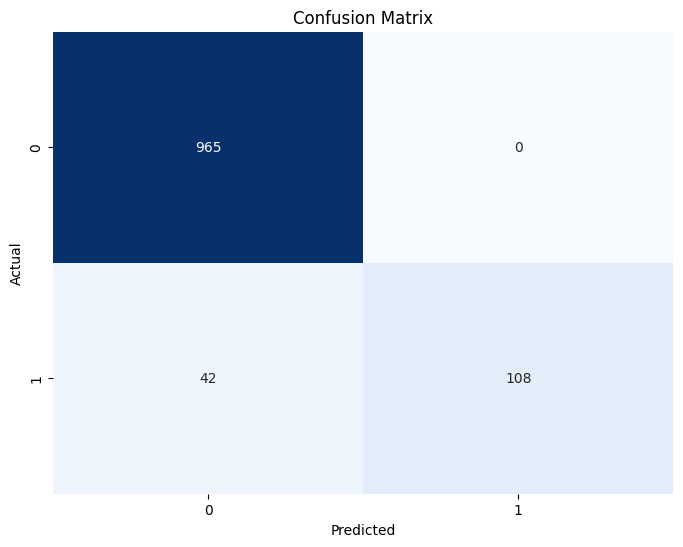

In [37]:
confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()